In [1]:
from loader import *
from shadowAccumulator import *

********************************************************************************
PlotOptiX newer version is available: 0.14.4
to update your release use:
      pip install plotoptix --upgrade
********************************************************************************


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

2


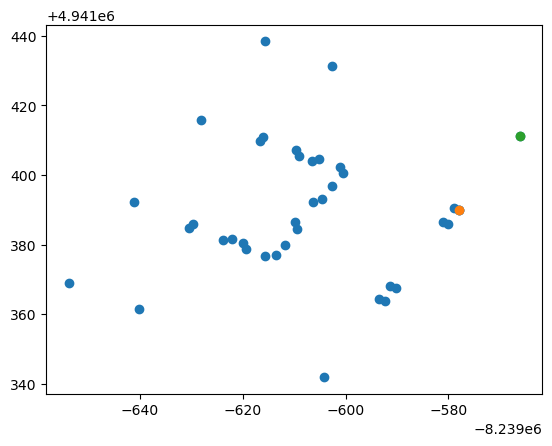

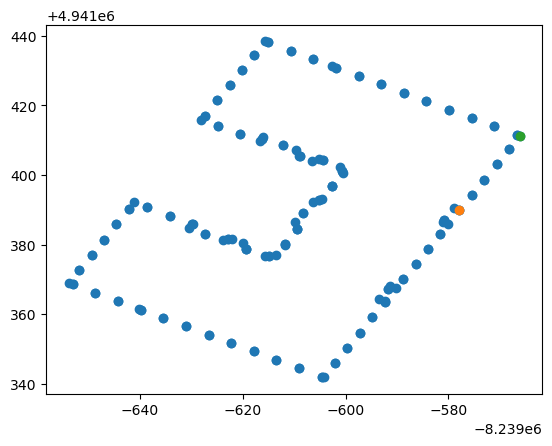

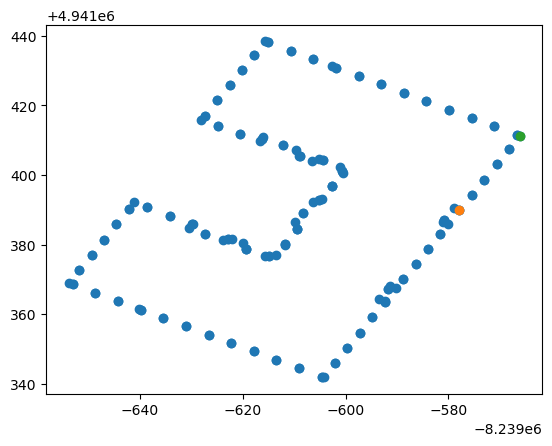

2


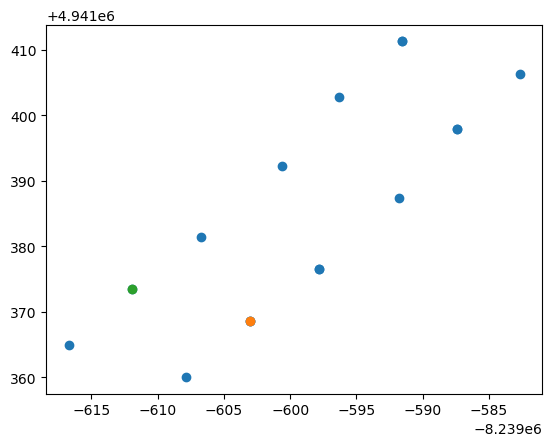

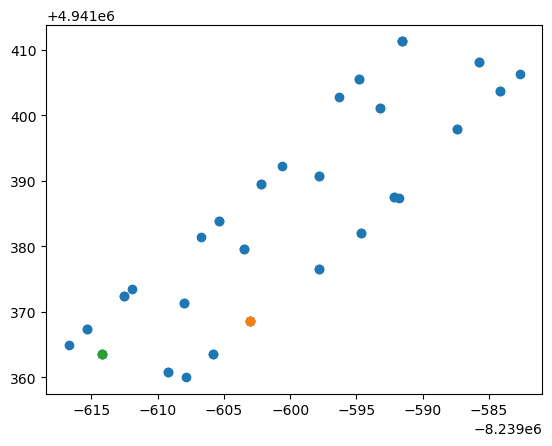

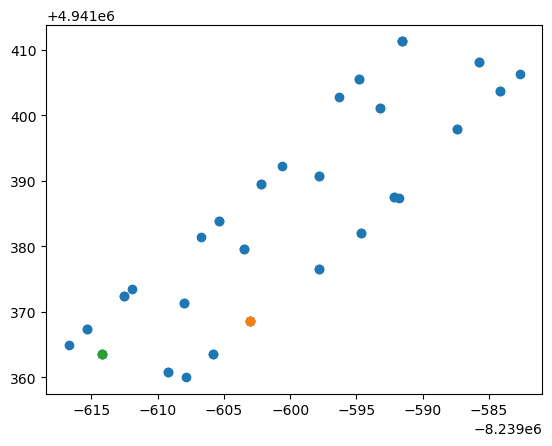

In [2]:
# uc = OSM.load_from_bbox([40.699838937,-74.0196528667,40.7073327656,-74.0082184426],layers=['coastline']) # south manhattan # error

# uc = OSM.load_from_bbox([40.699768, -74.019904, 40.71135, -74.004712],layers=['buildings']) # south manhattan

# uc = OSM.load_from_bbox([40.69961509036723, -74.02268874354345, 40.70796231892495, -74.00846222529327],layers=['buildings']) # smaller south manhattan

# uc = OSM.load_from_bbox([-22.9116387034, -43.138063104, -22.8949298301, -43.118236215],layers=['coastline']) # niteroi, issues error for coastline
uc = OSM.load_from_bbox([40.70695265056355, -74.01818677471793, 40.7076533306313, -74.01718208165698],layers=['buildings']) # one building manhattan
# uc = OSM.load_from_bbox([40.70695265056355, -74.01818677471793, 40.70830848157795, -74.0167710457299],layers=['buildings']) # two buildings manhattan

uc.to_file('../../../public/data/one_building/', True)
# shadowAccumulator = ShadowAccumulator(['../../../public/data/one_building/buildings.json', '../../../public/data/one_building/surface.json'], "03/20/2015 10:00", "03/20/2015 11:01", 'spring')
# shadowAccumulator.accumulate_shadow()